In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


In [3]:
# Read data
data = pd.read_csv("ac_data.csv", sep=';')
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1]
data.head()

,Temperature,AC_sales
0,13.1,944
1,14.3,1134
2,21.8,1145
3,12.2,1165
4,13.4,1224


Text(0, 0.5, 'AC_sales')

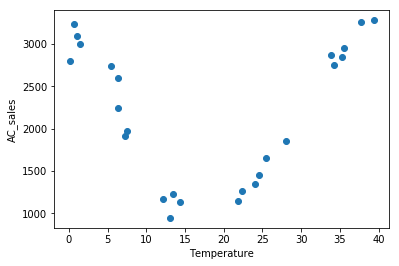

In [4]:
# Plot the data
plt.plot(X, y, 'o')
plt.xlabel(data.columns.values[0])
plt.ylabel(data.columns.values[1])


In [5]:
# Create test space
X_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)


In [6]:
# Apply linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred_d1 = model.predict(X_test)


In [7]:
# Show equation for first model
print('Equation: y = ' + str(model.intercept_) + ' + ' + str(model.coef_))


Equation: y = 2102.9336452286143 + [4.67594967]


In [8]:
# Apply polynomial regression model
degree = 4
poly_features = PolynomialFeatures(degree = degree, include_bias = False)
model = LinearRegression()
model.fit(poly_features.fit_transform(X), y)
y_pred_d4 = model.predict(poly_features.fit_transform(X_test))


In [10]:
# Show equation for second model
print('Equation: y = ' + str(model.intercept_) + ' + ' +         ' + '.join(str(model.coef_[d]) + ' * x^' + str(d+1) for d in range(degree)))


Equation: y = 3128.2994604773144 + -72.02467167515609 * x^1 + -16.04075570092937 * x^2 + 0.9840968912140846 * x^3 + -0.013445100365949259 * x^4


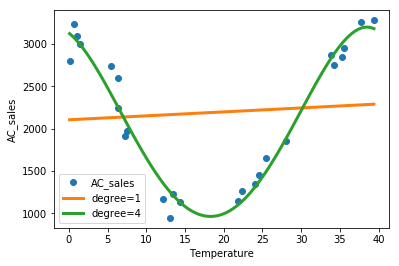

In [11]:
# Plot the two models
plt.figure()
plt.plot(X, y, 'o')
plt.plot(X_test, y_pred_d1, linewidth=3, label="degree=1")
plt.plot(X_test, y_pred_d4, linewidth=3, label="degree=" + str(degree))
plt.legend()
plt.xlabel(data.columns.values[0])
plt.ylabel(data.columns.values[1])
plt.show()


In [13]:
# Calculate RMSE for different polynomial degrees
errors = []
degrees = list(range(1, 11))
for degree in degrees:
	poly_features = PolynomialFeatures(degree = degree)
	X_poly = poly_features.fit_transform(X)
	model = LinearRegression()
	model.fit(X_poly, y)
	y_pred = model.predict(X_poly)
	errors.append(sqrt(mean_squared_error(y, y_pred)))


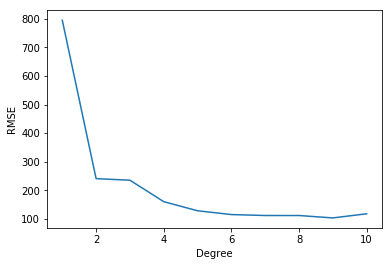

In [14]:
plt.figure()
plt.plot(degrees, errors)
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.show()

